In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# simple dataframe

import pandas as pd

pd.set_option("display.max_columns", 7)
df_original = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values=["Na", "?"])

# display(df[0:5])
df_original.head()

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
2,18.0,8,318.0,...,70,1,plymouth satellite
3,16.0,8,304.0,...,70,1,amc rebel sst
4,17.0,8,302.0,...,70,1,ford torino


In [3]:
df_original["horsepower"].isna().values.any()

True

In [4]:
# simple dataframe

import pandas as pd

# pd.set_option("display.max_columns", 7)
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv")

# display(df[0:5])
df.head()

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
2,18.0,8,318.0,...,70,1,plymouth satellite
3,16.0,8,304.0,...,70,1,amc rebel sst
4,17.0,8,302.0,...,70,1,ford torino


In [5]:
# pd.set_option("display.max_columns", 10)
# pd.set_option("display.max_rows", 5)

display(df)

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
2,18.0,8,318.0,...,70,1,plymouth satellite
3,16.0,8,304.0,...,70,1,amc rebel sst
4,17.0,8,302.0,...,70,1,ford torino
...,...,...,...,...,...,...,...
393,27.0,4,140.0,...,82,1,ford mustang gl
394,44.0,4,97.0,...,82,2,vw pickup
395,32.0,4,135.0,...,82,1,dodge rampage
396,28.0,4,120.0,...,82,1,ford ranger


In [6]:
df.select_dtypes(include=["int", "float"])


,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1
394,44.0,4,97.0,2130,24.6,82,2
395,32.0,4,135.0,2295,11.6,82,1
396,28.0,4,120.0,2625,18.6,82,1


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# # Accessing columns in df
# df["mpg"]

# # access rows which have mpg value = 9
# df[df["mpg"] == 9]

# access rows with values greater than 10
df[df["mpg"] >= 10]

# find number of rows that have mpg values greater than 30
df[df["mpg"] >= 40]["name"]

# display mpg and name columns that have mpg > 40
df[df["mpg"] >= 40][["name", "mpg"]]

# display max values in each column
df.max(axis=0)

# display max values in each row
# df.max(axis=1) # Not working



mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                     ?
weight                      5140
acceleration                24.8
year                          82
origin                         3
name            vw rabbit custom
dtype: object

# Handling Missing Values

In [9]:

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values=["NA", "?"]
)

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [11]:
# find indexes where values are null
null_indices = df[df["horsepower"].isna()].index.to_list()
print(null_indices)

[32, 126, 330, 336, 354, 374]


# Replacing Missing Values 

In [12]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values=["NA", "?"]
)
df.head()

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
2,18.0,8,318.0,...,70,1,plymouth satellite
3,16.0,8,304.0,...,70,1,amc rebel sst
4,17.0,8,302.0,...,70,1,ford torino


In [13]:
pd.isna(df['horsepower']).values.any()

True

In [14]:
print("Filling missing values")
# filling with either median 
fill_median = df["horsepower"].median()
print(fill_median)

Filling missing values
93.5


In [15]:
df["horsepower"] = df["horsepower"].fillna(fill_median)
pd.isna(df["horsepower"].values.any())

False

In [16]:
df["horsepower"] = df["horsepower"].fillna(fill_median)


In [17]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [18]:
# for ind in null_indices:
#     print(df.iloc[ind])

# Dealing with outliers

In [19]:
# displacement vs outlier plots 
x = df["displacement"]
y = df["horsepower"]

# plt.scatter(x,y)
# plt.show()

fig = px.scatter(df, x="displacement", y="horsepower", color="cylinders")

fig.show()

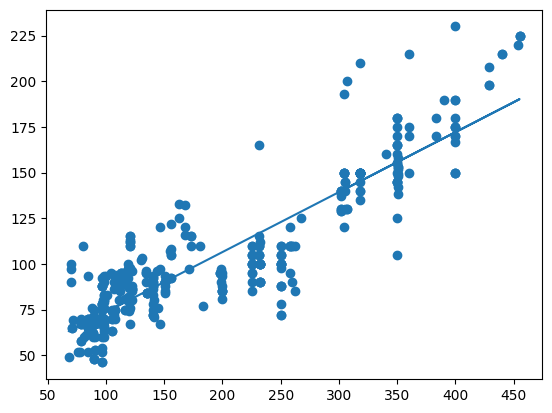

In [20]:
# fitting a line to scatter plot

from sklearn.linear_model import LinearRegression

x = df["displacement"].values
y = df["horsepower"].values


X,Y = x.reshape(-1,1), y.reshape(-1,1)
plt.plot(x, LinearRegression().fit(X,Y).predict(X))
plt.scatter(x,y)
plt.show()

In [21]:
# df.columns

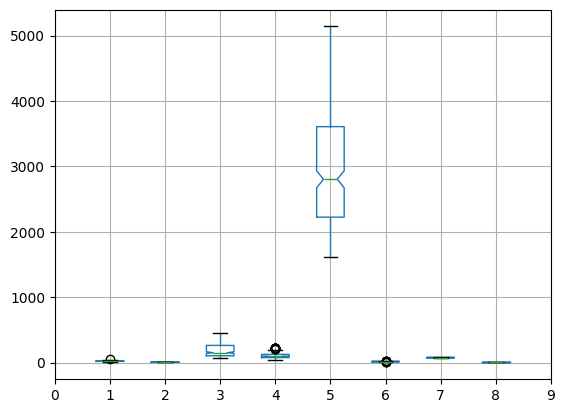

In [22]:
# Box plots with matplotlib

fig, ax = plt.subplots()
df.boxplot(ax = ax,  notch = True, bootstrap=5000)
ax.set_xticks(range(10))
ax.set_xticklabels(range(10))

plt.show()

In [23]:
# data = [df[col].values for col in df.columns]
# print(data[:8])

In [24]:
# # individual boxplots for columns 

# data = [df[col].values for col in df.columns][:8]
# # data = df["acceleration"].values
# # fig = plt.figure(figsize=(10, 10))

# plt.boxplot(data)
# plt.show()

In [25]:
# box plot using plotly
def box_whisker_plot(column_name):

    fig = px.box(df[column_name])
    fig.show()

box_whisker_plot("acceleration")

# Ways to deal with outliers


#### Five ways to deal with outliers

- Sorting data to find outliers (extreme values)
- Making box whisker plots to find outliers in data
- Histograms can also help where lowest height bars can be identified as outliers
- Fitted line plots
- Using Z-Scores in the Normal Distribution to detect outliers 
- Leverage interqurtile range to fence the outliers 
- Use hypothesis tests to find outliers (Challenges : Masking and Swamping)


# Remove outliers

In [26]:
# Remove all rows where the specified column is greater than or less than standard deviation. 

def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd*df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)

    

In [27]:
# distribution plot

def dist_plot_df(column_name):
#     # fig = px.histogram(df[column_name])
    fig = ff.create_distplot(hist_data=[df[column_name]], group_labels=[column_name])
    fig.show()

In [28]:
#To deal with outliers one way to achieve is to measure standard devaiation for each column and remove any columns that donot fall into the range. 

df[df["horsepower"] == 93.5]["horsepower"].index.tolist()


[32, 126, 330, 336, 354, 374]

In [39]:
def max_value_in_col(column_name):
    return df.loc[df[df[column_name] == df[column_name].max()].index].values

In [40]:
def total_analysys(subject_variable):
    print("standard Deviation:", df[subject_variable].std())
    print("maximum mpg is delivered by: \n ", max_value_in_col(subject_variable))
    print("Number of records: ", len(df))

    box_whisker_plot(subject_variable)
    dist_plot_df(subject_variable)



In [45]:
print(df.columns)
subject_variable = "origin"
total_analysys(subject_variable)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
standard Deviation: 0.7447666015851231
maximum mpg is delivered by: 
  [[24.0 4 113.0 95.0 2372 15.0 70 3 'toyota corona mark ii']
 [27.0 4 97.0 88.0 2130 14.5 70 3 'datsun pl510']
 [27.0 4 97.0 88.0 2130 14.5 71 3 'datsun pl510']
 [25.0 4 113.0 95.0 2228 14.0 71 3 'toyota corona']
 [31.0 4 71.0 65.0 1773 19.0 71 3 'toyota corolla 1200']
 [24.0 4 113.0 95.0 2278 15.5 72 3 'toyota corona hardtop']
 [19.0 3 70.0 97.0 2330 13.5 72 3 'mazda rx2 coupe']
 [28.0 4 97.0 92.0 2288 17.0 72 3 'datsun 510 (sw)']
 [23.0 4 120.0 97.0 2506 14.5 72 3 'toyouta corona mark ii (sw)']
 [27.0 4 97.0 88.0 2100 16.5 72 3 'toyota corolla 1600 (sw)']
 [20.0 4 97.0 88.0 2279 19.0 73 3 'toyota carina']
 [22.0 4 108.0 94.0 2379 16.5 73 3 'datsun 610']
 [18.0 3 70.0 90.0 2124 13.5 73 3 'maxda rx3']
 [20.0 6 156.0 122.0 2807 13.5 73 3 'toyota mark ii']
 [31.0 4 79.0 67.0 1950 19

In [53]:
# Analysing mpg if we look at the plot we see that 46.6 needs to be dropped to remove outlier values using standard deviation
remove_outliers(df, "mpg", 6)

total_analysys("mpg")

standard Deviation: 4.434407770031567
maximum mpg is delivered by: 
  [[31.3 4 120.0 75.0 2542 17.5 80 3 'mazda 626']]
Number of records:  251


# Dropping fields 

The fields that are not of value to the neural network to learn should be dropped in order to make sense of data to the network 

In [54]:
df.drop("name", axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,...,acceleration,year,origin
0,18.0,8,307.0,...,12.0,70,1
2,18.0,8,318.0,...,11.0,70,1
3,16.0,8,304.0,...,12.0,70,1
4,17.0,8,302.0,...,10.5,70,1
14,24.0,4,113.0,...,15.0,70,3


# Concatenating Rows and Columns

Columns within the dataframe can be concatenated to form new dataframes.


In [62]:
# Creating a new dataframe having name and horsepower

df_temp = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values=["NA", "?"])

horsepower_df = df_temp["horsepower"]
name_df = df_temp["name"]

result_df = pd.concat([name_df, horsepower_df], axis=1)
result_df
# print("name col", name_df)

,name,horsepower
0,chevrolet chevelle malibu,130.0
1,buick skylark 320,165.0
2,plymouth satellite,150.0
3,amc rebel sst,150.0
4,ford torino,140.0
...,...,...
393,ford mustang gl,86.0
394,vw pickup,52.0
395,dodge rampage,84.0
396,ford ranger,79.0


In [64]:
df_temp

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
2,18.0,8,318.0,...,70,1,plymouth satellite
3,16.0,8,304.0,...,70,1,amc rebel sst
4,17.0,8,302.0,...,70,1,ford torino
...,...,...,...,...,...,...,...
393,27.0,4,140.0,...,82,1,ford mustang gl
394,44.0,4,97.0,...,82,2,vw pickup
395,32.0,4,135.0,...,82,1,dodge rampage
396,28.0,4,120.0,...,82,1,ford ranger


In [66]:
# selecting rows and making them together

hor_concat_df = pd.concat([df[:2], df[-2:]], axis = 0)
hor_concat_df

,mpg,cylinders,displacement,...,acceleration,year,origin
0,18.0,8,307.0,...,12.0,70,1
2,18.0,8,318.0,...,11.0,70,1
396,28.0,4,120.0,...,18.6,82,1
397,31.0,4,119.0,...,19.4,82,1


# Prediction

## Training


We must evaluate a machine learning model based on its ability to predict values that it has never seen before. Because of this, we often divide the training data into a validation and training set. The machine learning model will learn from the training data but ultimately be evaluated based on the validation data.


- Training Data - In Sample Data - The data that the neural network used to train.
- Validation Data - Out of Sample Data - The data that the machine learning model is evaluated upon after it is fit to the training data.
There are two effective means of dealing with training and validation data:

Training/Validation Split - The program splits the data according to some ratio between a training and validation (hold-out) set. Typical rates are 80% training and 20% validation.
K-Fold Cross Validation - The program splits the data into several folds and models. Because the program creates the same number of models as folds, the program can generate out-of-sample predictions for the entire dataset.
The code below splits the MPG data into a training and validation set. The training set uses 80% of the data, and the validation set uses 20%. Figure 2.TRN-VAL shows how we train a model on 80% of the data and then validated against the remaining 20%.

Figure 2.TRN-VAL: Training and Validation

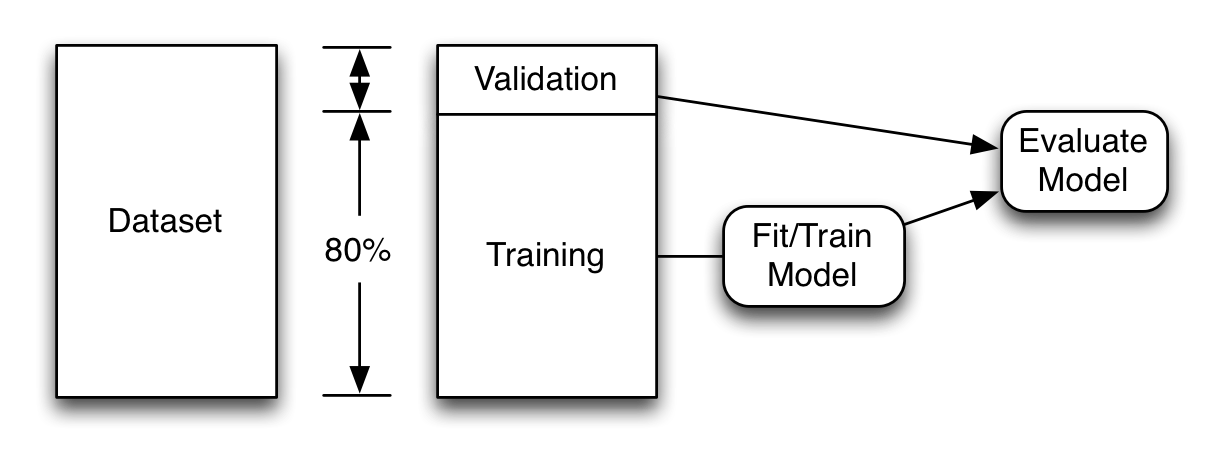

### Training Specific Data Pre- Processing steps

- Shuffling data
1. **Preventing Order Bias**: Training on inherent order can lead to biased learning (Time Series data, Sorted Categories). Shuffling ensures that model does not learn the order but rather the underlying patterns.
2. **Ensuring IID Assumption**: ML models assume that data points are independantly and identically distributed(IID). Shuffling helps to meet this assumption by mixing the data points.
3. **Improving Generalization**: Shuffling helps the model generalize better by exposing it to a more diverse set of examples in each training batch, reducing the risk of overfitting to a particular sequence of data.
4. **Balanced Batches**: When using mini-batch gradient descent, shuffling ensures that each batch is representative of the entire dataset, leading to more stable and reliable gradient updates.

In [81]:
# Two ways to shuffle scikitlearn and numpy 

from sklearn.utils import shuffle

df_shuffled = shuffle(df)

# Using numpy 

# df = df.reindex(np.random.permutation(df.index))




### Saving shuffled data to a file
- Use CSV if you need interoperability, human readability, or if your data consists of simple data types.
- Use Pickle if you need to save complex data types, require faster read/write performance, or want to minimize file size.

In [83]:
df_shuffled.to_pickle(r"D:\aiml_basics\dataset\autompg_shuffled_df.pkl")

### Splitting data into training and validation

In [85]:
# using scikit learn
from sklearn.model_selection import train_test_split

df_shuffled = pd.read_pickle(r"D:\aiml_basics\dataset\autompg_shuffled_df.pkl")

train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=12)

print("training: ", len(train_df), "\ntest_df:", len(test_df))


# # Using pandas
# mask = np.random.rand(len(df)) <0.8

# train_df = pd.DataFrame(df[mask])

# validation_df = pd.DataFrame(df[~mask])

# print(f"Training DF: {len(train_df)}")
# print(f"Validation DF: {len(validation_df)}")

training:  200 
test_df: 51


### Converting a dataframe to a matrix

Neural Networks donot directly operate on Python data frames. A neural network requires a numeric matrix. The program uses a data frame's values property to convert the data into matrix

In [79]:
df.values

array([[ 31. ,   4. , 112. , ...,  16.2,  82. ,   1. ],
       [ 20. ,   4. , 114. , ...,  14. ,  73. ,   2. ],
       [ 16.9,   8. , 350. , ...,  14.9,  79. ,   1. ],
       ...,
       [ 25. ,   4. , 140. , ...,  17. ,  74. ,   1. ],
       [ 30.5,   4. ,  98. , ...,  17. ,  77. ,   1. ],
       [ 25.1,   4. , 140. , ...,  15.4,  78. ,   1. ]])

### Training the model

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df_shuffled = pd.read_pickle(r"D:\aiml_basics\dataset\autompg_shuffled_df.pkl")

X = df_shuffled.drop(columns=["mpg"])
y = df_shuffled["mpg"]



# train_X, test_x, train_Y, test_y = train_test_split(df_shuffled, test_size=0.2, random_state=42)

# if there are any categorical values use this 
# X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_X, test_x, train_Y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)




In [92]:

model = LinearRegression()

model.fit(train_X, train_Y)

# predict on the test set



LinearRegression()

In [93]:
predictions = model.predict(test_x)

In [94]:
# Evaluate the model 
mse = mean_squared_error(test_y, predictions)
print("Mean Square Error:", mse)


Mean Square Error: 5.659110505125751


In [95]:
r2 = r2_score(test_y, predictions)
print(f"R-Squared: {r2}")

R-Squared: 0.694656618158779


In [97]:
# Analyzing if the output is good

baseline_predictions = np.mean(test_y)

baseline_mse = mean_squared_error(test_y, [baseline_predictions] * len(test_y))

print(f"Baseline Mean Squared Error: {baseline_mse}")

Baseline Mean Squared Error: 18.533594771241834


In [98]:
r2 = r2_score(test_y, predictions)
print(f"R-Squared: {r2}")

R-Squared: 0.694656618158779


Interpretation
- Lower MSE: Generally, a lower MSE indicates a better fit.
- R-Squared: An R-squared value closer to 1 indicates a better fit.

In [99]:
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

# Baseline model: predict the mean of the target variable
baseline_predictions = np.mean(test_y)
baseline_mse = mean_squared_error(test_y, [baseline_predictions] * len(test_y))

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")
print(f"Baseline Mean Squared Error: {baseline_mse}")

Mean Squared Error: 5.659110505125751
R-Squared: 0.694656618158779
Baseline Mean Squared Error: 18.533594771241834


## Change model to RandomForest

In [3]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()



